# Problem 1:

Gaussian normal deviates z 

mean = z_0
standard deviation sigma

In [1]:
import numpy as np
import math
from math import log, pi


z_0 = -1
sigma = 2
x = np.random.rand()
# z = x*sigma + z_0

In [2]:
def r(v):
    x = np.random.rand()
    return np.sqrt(-2*(v**2)*log(1-x))

In [3]:
def x(k):
    
    theta = 2*pi*np.random.rand()
    
    return k*math.cos(theta)

In [4]:
def y(n):
    
    theta = 2*pi*np.random.rand()
    return n*math.sin(theta)

In [5]:
from matplotlib import pyplot as plt
N = 0

X = []
Y = []
Z = []

while N < 1000:
    m = r(sigma)
    a = x(m)
    b = y(m)
    c = a + z_0
    X.append(a)
    Y.append(b)
    Z.append(c)
    N +=1

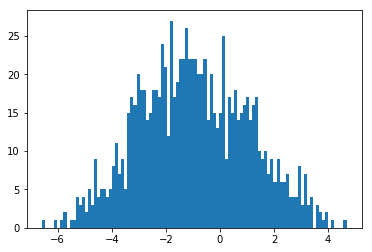

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

In [6]:
plt.hist(Z,100)
plt.show()
plt.grid

# Problem 2:

In [12]:
from random import random
from numpy import arange
from matplotlib import pyplot as plt

In [17]:
#constants:

Bi_213 = 100   # number of Bi 213 atoms
Bi_209 = 0 #number of Bi 209 atoms
Pb = 0  # number of Pb atoms
TI = 0 #number of TI atoms

Bitau = 46 * 60 #converting half life of Bi to seconds
TItau = 2.2 * 60 #half life of Ti in seconds
Pbtau = 3.3 * 60 #half life of Pb in seconds

#since Bi_209 is stable, we don't have to worry about tau for it.

t = 1.0      # size of the time step in seconds 
tmax = 200
# Total time

In [18]:
# Probability of decay in one step

def P(tau):
    return 1 - 2**(-t/tau)  

In [19]:
#Create lists of atoms:

tpoints = arange(0.0,tmax,t)
Bi213points = []
Pbpoints = []
TIpoints = []
Bi209points = []

In [ ]:
#Main loop:

for t in tpoints:
    Bi213points.append(Bi_213)
    Pbpoints.append(Pb)
    TIpoints.append(TI)
    Bi209points.append(Bi_209)
    
    #Calculate the number of atoms that decay:
    decayBi = 0
    decayPb = 0
    decayTI = 0
    
    for i in range(Pb):
        if random() < P(Pbtau):
            decayPb += 1
    Bi_209 -= decayPb
    Pb += decayPb

    for j in range(TI):
        if random() < P(TItau):
            decayTI += 1
    TI -= decayTI
    Pb += decayTI
        
    for k in range(Bi_213):
        if random() < P(Bitau):
            decayBi += 1
            if random() > 0.029:
                Bi_213 -= decayBi
                Pb += decayBi
            else:
                Bi_213 -= decayBi
                TI += decayBi

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(tpoints,Bi213points,s=5,c="r",alpha=0.3)
ax.scatter(tpoints,Pbpoints,s=5,c="k",alpha=0.3)
ax.scatter(tpoints,TIpoints,s=5,c="c",alpha=0.3)
ax.scatter(tpoints,Bi209points,s=5,c="m",alpha=0.3)
ax.set_xlabel("$Time$ $(s)$", size =20)
ax.set_ylabel("Number of Atoms", size =20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
